In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head(15)

,id,id_поста,дата_поста,день_недели,количество_лайков,текст_поста
0,1,1292,2025-09-24 22:10:33,3,16,"Нейрофотографии) вышло задорно, со вкусом. Ней..."
1,2,1291,2025-09-10 23:40:33,3,1,Посетил центральный матч тура кубка России 🇷🇺 ...
2,3,1290,2025-09-09 20:22:44,2,1,[Текст отсутствует]
3,4,1289,2025-09-07 13:04:33,7,0,[Текст отсутствует]
4,5,1288,2025-08-31 12:28:05,7,26,"5 30 утра, встречали последний рассвет лета ☀️..."
5,6,1287,2025-08-30 22:36:19,6,23,"30.08 суббота. Центральный парк. 5 верст, очер..."
6,7,1286,2025-08-22 18:27:46,5,6,В возрасте 78 лет скончался певец Ярослав Евдо...
7,8,1285,2025-08-20 21:41:42,3,17,Посетил матч кубка России «Кристалл-МЭЗТ» / «М...
8,9,1281,2025-07-13 11:27:48,7,29,12.07 поучаствовал в очередном старте на 5 км....
9,10,1280,2025-06-29 20:09:17,7,14,"28.06.2025 - в 9 утра, совместно с беговым клу..."


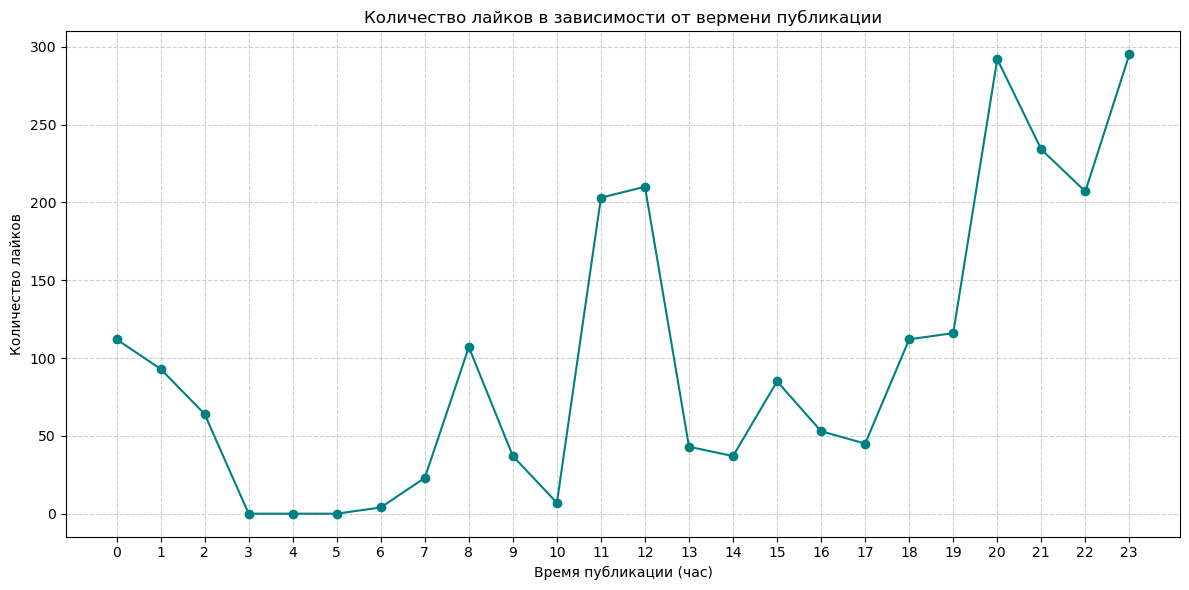

In [3]:
# Преобразование даты в datetime
df['дата_поста'] = pd.to_datetime(df['дата_поста'])

# Извлечение часа и дня недели (на всякий случай)
df['час'] = df['дата_поста'].dt.hour
df['день_недели_имя'] = df['дата_поста'].dt.day_name(locale='ru_RU')  # на русском

# Группировка по часу и подсчёт общего количества лайков
likes_by_hour = df.groupby('час')['количество_лайков'].sum().reindex(range(24), fill_value=0)

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(likes_by_hour.index, likes_by_hour.values, marker='o', color='teal')
plt.title('Количество лайков в зависимости от вермени публикации')
plt.xlabel('Время публикации (час)')
plt.ylabel('Количество лайков')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

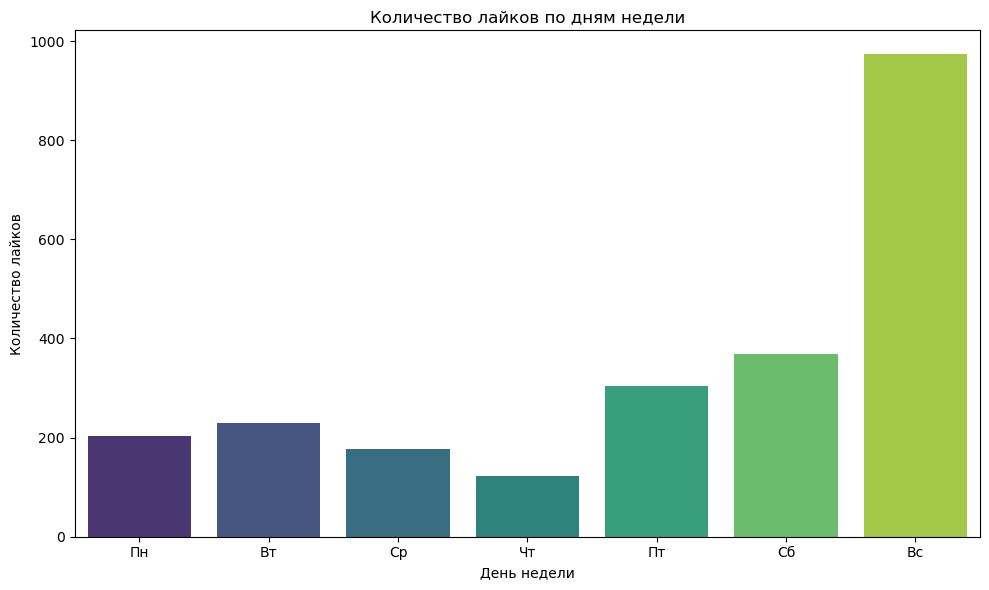

In [4]:
# Группировка по дням недели
likes_by_dow = df.groupby(df['дата_поста'].dt.weekday)['количество_лайков'].sum()
days_order = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
likes_by_dow.index = days_order

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x=likes_by_dow.index, y=likes_by_dow.values, palette='viridis')
plt.title('Количество лайков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество лайков')
plt.tight_layout()
plt.show()